In [104]:
#unpickling
import pickle
with open('/content/images.p','rb') as f:
  images = pickle.load(f)
with open('/content/labels.p','rb') as f:
  labels = pickle.load(f)



In [105]:
print(images.shape)
print(labels.shape)

(281, 100, 100)
(281,)


In [106]:
set(labels)

{'Neeshikant', 'Sandhya', 'Smruti'}

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels=le.fit_transform(labels)

In [109]:
set(labels)

{0, 1, 2}

In [110]:
le.inverse_transform([0,1,2])

array(['Neeshikant', 'Sandhya', 'Smruti'], dtype='<U10')

In [111]:
n_persons=len(set(labels))
print("Number of persons",n_persons)
l=le.inverse_transform(np.arange(n_persons))
for i in range(len(l)):
  print(i,'-->',l[i])

Number of persons 3
0 --> Neeshikant
1 --> Sandhya
2 --> Smruti


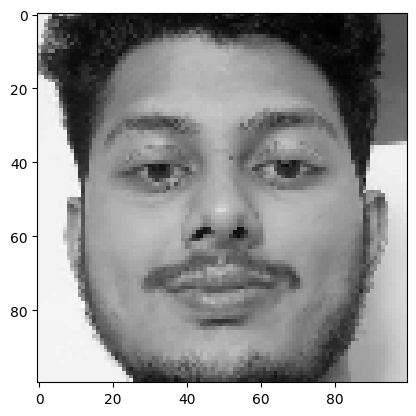

In [112]:
plt.imshow(images[10],cmap='gray')
plt.show()

In [113]:
import cv2
def preprocessing(img):
  img=cv2.equalizeHist(img)
  img=img.reshape(100,100,1)
  img=img/255
  return img

In [114]:
images=np.array(list(map(preprocessing,images)))
print("Shape of Input:",images.shape)

Shape of Input: (281, 100, 100, 1)


In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [116]:
from keras.utils import to_categorical
labels=to_categorical(labels)

In [117]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [118]:
def Lenet_Model():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(30,activation='relu'))

  model.add(Dense(3,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [119]:
model=Lenet_Model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 96, 96, 30)        780       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 48, 48, 30)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 15)        4065      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 23, 15)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 7935)              0         
                                                                 
 dense_12 (Dense)            (None, 30)               

In [120]:
model.fit(images, labels, validation_split=0.1, epochs=10)

Epoch 1/10
8/8 [==============================] - 3s 307ms/step - loss: 1.5742 - accuracy: 0.4246 - val_loss: 0.7343 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 3s 414ms/step - loss: 0.5320 - accuracy: 0.8929 - val_loss: 0.1427 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 2s 264ms/step - loss: 0.1095 - accuracy: 0.9563 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 2s 296ms/step - loss: 0.0511 - accuracy: 0.9881 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 2s 254ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1357 - val_accuracy: 0.9310
Epoch 6/10
8/8 [==============================] - 2s 253ms/step - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.0714 - val_accuracy: 0.9655
Epoch 7/10
8/8 [==============================] - 3s 361ms/step - loss: 1.7732e-04 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9655
Epoch 8/10
8/8 [

In [121]:
model.save("final_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
